In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bar_chart_race


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import bar_chart_race as bcr
from wordcloud import WordCloud
import warnings

## Read Data

In [ ]:
Ananya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2021_Top_Songs.csv')
Ananya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2022_Top_Songs.csv')

Arushi_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2021_Top_Songs.csv')
Arushi_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2022_Top_Songs.csv')

Ritika_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2021_Top_Songs.csv')
Ritika_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2022_Top_Songs.csv')

Shriya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2021_Top_Songs.csv')
Shriya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2022_Top_Songs.csv')


In [ ]:
Ananya_df_2022.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri,release_year
0,Unloving You,Unloving You,Anson Seabra,2022-03-22,153863,64,0.63300,0.765,0.393,0.00000,0.1420,-9.616,0.0311,121.909,0.224,4,6,1,spotify:track:2w9nvs1ByWUGkED4M0ug34,2022
1,That That (prod.&feat. SUGA of BTS),PSY 9th,PSY,2022-04-29,174646,76,0.02990,0.905,0.962,0.00000,0.0272,-3.197,0.0856,129.969,0.906,4,4,1,spotify:track:7GNRUsU3M4XNDDB9xle5Dz,2022
2,smile again,everything means nothing,blackbear,2020-08-21,149253,55,0.59700,0.680,0.423,0.00000,0.3710,-6.279,0.0321,85.042,0.686,4,6,1,spotify:track:0rWMOzZ7fFYZWI1qlCY4Ig,2020
3,With you,"Our Blues, Pt. 4 (Original Television Soundtrack)",Jimin,2022-04-24,201905,75,0.63900,0.532,0.426,0.00000,0.1340,-6.117,0.0288,149.898,0.137,3,3,1,spotify:track:2gzhQaCTeNgxpeB2TPllyY,2022
4,MORE,Jack In The Box,j-hope,2022-07-15,180022,73,0.00537,0.783,0.722,0.00209,0.1050,-4.864,0.0357,97.031,0.306,4,2,1,spotify:track:7GARzfC1mwhDuk4t9WOACq,2022


In [ ]:
Ananya_df_2022

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri,release_year
0,Unloving You,Unloving You,Anson Seabra,2022-03-22,153863,64,0.633000,0.765,0.393,0.00000,0.1420,-9.616,0.0311,121.909,0.2240,4,6,1,spotify:track:2w9nvs1ByWUGkED4M0ug34,2022
1,That That (prod.&feat. SUGA of BTS),PSY 9th,PSY,2022-04-29,174646,76,0.029900,0.905,0.962,0.00000,0.0272,-3.197,0.0856,129.969,0.9060,4,4,1,spotify:track:7GNRUsU3M4XNDDB9xle5Dz,2022
2,smile again,everything means nothing,blackbear,2020-08-21,149253,55,0.597000,0.680,0.423,0.00000,0.3710,-6.279,0.0321,85.042,0.6860,4,6,1,spotify:track:0rWMOzZ7fFYZWI1qlCY4Ig,2020
3,With you,"Our Blues, Pt. 4 (Original Television Soundtrack)",Jimin,2022-04-24,201905,75,0.639000,0.532,0.426,0.00000,0.1340,-6.117,0.0288,149.898,0.1370,3,3,1,spotify:track:2gzhQaCTeNgxpeB2TPllyY,2022
4,MORE,Jack In The Box,j-hope,2022-07-15,180022,73,0.005370,0.783,0.722,0.00209,0.1050,-4.864,0.0357,97.031,0.3060,4,2,1,spotify:track:7GARzfC1mwhDuk4t9WOACq,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28 (feat. NiiHWA),D-2,Agust D,2020-05-22,133673,64,0.089700,0.679,0.645,0.00000,0.1210,-7.107,0.0513,119.934,0.3490,4,9,0,spotify:track:3pGNUEIlaUlCU8mXxKInzw,2020
96,Karma,Midnights,Taylor Swift,2022-10-21,204852,90,0.073400,0.642,0.620,0.00000,0.4830,-7.091,0.0666,90.020,0.0969,4,8,1,spotify:track:7KokYm8cMIXCsGVmUvKtqf,2022
97,Intro : Persona,Proof,BTS,2022-06-10,171023,53,0.027800,0.486,0.871,0.00000,0.3130,-4.475,0.3370,85.411,0.6590,4,9,0,spotify:track:1e45vYKAMljTZUQUotLdq2,2022
98,Hope World,Hope World,j-hope,2018-03-02,204930,64,0.013800,0.706,0.895,0.00000,0.5950,-4.456,0.1600,117.007,0.7710,4,1,1,spotify:track:5UMPPsXaGbR1qtzcnEtTpM,2018


## Inspect Data

In [ ]:
Shriya_df_2022[['name', 'artist', 'album', 'release_date']].head()


,name,artist,album,release_date
0,Enemy - From the series Arcane League of Legends,Imagine Dragons,Enemy (from the series Arcane League of Legends),2021-10-27
1,Cinema,Harry Styles,Harry's House,2022-05-20
2,Go!,DOKYEOM,Twenty-Five Twenty-One OST Part 5,2022-02-27
3,Sirens,Imagine Dragons,Mercury - Acts 1 & 2,2022-07-01
4,gold rush,Taylor Swift,evermore (deluxe version),2021-01-07


In [ ]:
Ananya_df_2022[['name', 'artist', 'album', 'release_date']].head()

,name,artist,album,release_date
0,Unloving You,Anson Seabra,Unloving You,2022-03-22
1,That That (prod.&feat. SUGA of BTS),PSY,PSY 9th,2022-04-29
2,smile again,blackbear,everything means nothing,2020-08-21
3,With you,Jimin,"Our Blues, Pt. 4 (Original Television Soundtrack)",2022-04-24
4,MORE,j-hope,Jack In The Box,2022-07-15


In [ ]:
Ananya_df_2021[['name', 'artist', 'album', 'release_date']].head()

,name,artist,album,release_date
0,Butter,BTS,"Butter (Hotter, Sweeter, Cooler)",2021-06-04
1,Trivia 轉 : Seesaw,BTS,Love Yourself 結 'Answer',2018-08-24
2,Permission to Dance,BTS,Butter / Permission to Dance,2021-07-09
3,My Universe,Coldplay,My Universe,2021-09-24
4,Dynamite,BTS,BE,2020-11-20


In [ ]:
Shriya_df_2022_ = Shriya_df_2022[['artist', 'name']]\
    .groupby('artist')\
    .count()\
    .sort_values('name', ascending=False)\
    .reset_index()
Shriya_df_2022_.columns = ['artist', 'count']
Shriya_df_2022_.head()

,artist,count
0,Taylor Swift,23
1,Imagine Dragons,19
2,Harry Styles,11
3,BTS,3
4,Conan Gray,3


In [ ]:
len_artists = len(Shriya_df_2022[['artist']].groupby('artist').count())
print(f'Shriya had {len_artists} artists in the 100 songs in 2022.')

Shriya had 40 artists in the 100 songs in 2022.


## Time to concatenate Everyone's top artist list

In [ ]:
Ananya_df_2021_ = Ananya_df_2021[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Ananya_df_2021_.columns = ['Ananya_artist_2021', 'Ananya_count_2021']
Ananya_df_2021_.head()


,Ananya_artist_2021,Ananya_count_2021
0,BTS,26
1,Agust D,16
2,RM,7
3,IU,5
4,Various Artists,4


In [ ]:
Ananya_df_2022_ = Ananya_df_2022[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Ananya_df_2022_.columns = ['Ananya_artist_2022', 'Ananya_count_2022']
Ananya_df_2022_.head()

,Ananya_artist_2022,Ananya_count_2022
0,BTS,20
1,j-hope,15
2,Agust D,12
3,Anuv Jain,9
4,RM,7


In [ ]:
Arushi_df_2021_ = Arushi_df_2021[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Arushi_df_2021_.columns = ['Arushi_artist_2021', 'Arushi_count_2021']
Arushi_df_2021_.head()

,Arushi_artist_2021,Arushi_count_2021
0,BTS,26
1,Ariana Grande,7
2,Agust D,4
3,Troye Sivan,3
4,j-hope,3


In [ ]:
Arushi_df_2022_ = Arushi_df_2022[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Arushi_df_2022_.columns = ['Arushi_artist_2022', 'Arushi_count_2022']
Arushi_df_2022_.head()

,Arushi_artist_2022,Arushi_count_2022
0,The Weeknd,10
1,Juice WRLD,8
2,BTS,8
3,Troye Sivan,7
4,Ashnikko,6


In [ ]:
Ritika_df_2021_ = Ritika_df_2021[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Ritika_df_2021_.columns = ['Ritika_artist_2021', 'Ritika_count_2021']
Ritika_df_2021_.head()

,Ritika_artist_2021,Ritika_count_2021
0,BTS,26
1,(G)I-DLE,7
2,Agust D,5
3,j-hope,5
4,RM,4


In [ ]:
Ritika_df_2022_ = Ritika_df_2022[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Ritika_df_2022_.columns = ['Ritika_artist_2022', 'Ritika_count_2022']
Ritika_df_2022_.head()

,Ritika_artist_2022,Ritika_count_2022
0,j-hope,14
1,TWICE,12
2,BTS,11
3,(G)I-DLE,5
4,ENHYPEN,3


In [ ]:
Shriya_df_2021_ = Shriya_df_2021[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Shriya_df_2021_.columns = ['Shriya_artist_2021', 'Shriya_count_2021']
Shriya_df_2021_.head()

,Shriya_artist_2021,Shriya_count_2021
0,Imagine Dragons,14
1,Taylor Swift,10
2,Conan Gray,7
3,Ariana Grande,6
4,OneRepublic,5


In [ ]:
Shriya_df_2022_ = Shriya_df_2022[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
Shriya_df_2022_.columns = ['Shriya_artist_2022', 'Shriya_count_2022']
Shriya_df_2022_.head()

,Shriya_artist_2022,Shriya_count_2022
0,Taylor Swift,23
1,Imagine Dragons,19
2,Harry Styles,11
3,BTS,3
4,Conan Gray,3


In [ ]:
df_concat = pd.concat([Ananya_df_2021_, Arushi_df_2021_, Ritika_df_2021_, Shriya_df_2021_], axis=1)
df_concat.head()

,Ananya_artist_2021,Ananya_count_2021,Arushi_artist_2021,Arushi_count_2021,Ritika_artist_2021,Ritika_count_2021,Shriya_artist_2021,Shriya_count_2021
0,BTS,26.0,BTS,26,BTS,26,Imagine Dragons,14.0
1,Agust D,16.0,Ariana Grande,7,(G)I-DLE,7,Taylor Swift,10.0
2,RM,7.0,Agust D,4,Agust D,5,Conan Gray,7.0
3,IU,5.0,Troye Sivan,3,j-hope,5,Ariana Grande,6.0
4,Various Artists,4.0,j-hope,3,RM,4,OneRepublic,5.0


In [ ]:
df_concat = pd.concat([Ananya_df_2022_, Arushi_df_2022_, Ritika_df_2022_, Shriya_df_2022_], axis=1)
df_concat.head()

,Ananya_artist_2022,Ananya_count_2022,Arushi_artist_2022,Arushi_count_2022,Ritika_artist_2022,Ritika_count_2022,Shriya_artist_2022,Shriya_count_2022
0,BTS,20.0,The Weeknd,10.0,j-hope,14,Taylor Swift,23.0
1,j-hope,15.0,Juice WRLD,8.0,TWICE,12,Imagine Dragons,19.0
2,Agust D,12.0,BTS,8.0,BTS,11,Harry Styles,11.0
3,Anuv Jain,9.0,Troye Sivan,7.0,(G)I-DLE,5,BTS,3.0
4,RM,7.0,Ashnikko,6.0,ENHYPEN,3,Conan Gray,3.0


## Count of Artists in 2021

In [ ]:
len_artists = len(Ananya_df_2021[['artist']].groupby('artist').count())
print(f'Ananya had {len_artists} artists in the 100 songs in 2021.')

len_artists = len(Arushi_df_2021[['artist']].groupby('artist').count())
print(f'Arushi had {len_artists} artists in the 100 songs in 2021.')

len_artists = len(Ritika_df_2021[['artist']].groupby('artist').count())
print(f'Ritika had {len_artists} artists in the 100 songs in 2021.')

len_artists = len(Shriya_df_2021[['artist']].groupby('artist').count())
print(f'Shriya had {len_artists} artists in the 100 songs in 2021.')



Ananya had 34 artists in the 100 songs in 2021.
Arushi had 53 artists in the 100 songs in 2021.
Ritika had 53 artists in the 100 songs in 2021.
Shriya had 48 artists in the 100 songs in 2021.


## Count of Artists in 2022

In [ ]:
len_artists = len(Ananya_df_2022[['artist']].groupby('artist').count())
print(f'Ananya had {len_artists} artists in the 100 songs in 2022.')

len_artists = len(Arushi_df_2022[['artist']].groupby('artist').count())
print(f'Arushi had {len_artists} artists in the 100 songs in 2022.')

len_artists = len(Ritika_df_2022[['artist']].groupby('artist').count())
print(f'Ritika had {len_artists} artists in the 100 songs in 2022.')

len_artists = len(Shriya_df_2022[['artist']].groupby('artist').count())
print(f'Shriya had {len_artists} artists in the 100 songs in 2022.')

Ananya had 34 artists in the 100 songs in 2022.
Arushi had 46 artists in the 100 songs in 2022.
Ritika had 50 artists in the 100 songs in 2022.
Shriya had 40 artists in the 100 songs in 2022.


# ***Data Visualization***

Songs per Artist in 2021

In [ ]:
plt.rcParams["figure.figsize"] = (5, 7)


In [ ]:
 from warnings import simplefilter
 simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [ ]:
#for df, year, count in zip(
#    [Ananya_df_2021_, Arushi_df_2021_, Ritika_df_2021_,Shriya_df_2021_],
#    ['Ananya', 'Arushi', 'Ritika', 'Shriya'],
#    ['Ananya_count_2021', 'Arushi_count_2021', 'Ritika_count_2021', 'Shriya_count_2021']):
#    df['artist'] = df.iloc[:,0]
#    df['year'] = [year] * len(df)
#    df['count'] = df[count]
#    df = df[['artist', 'year', 'count']]

#bar_chart_race_df = pd.concat([Ananya_df_2021_, Arushi_df_2021_, Ritika_df_2021_, Shriya_df_2021_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

#df_bcr = pd.DataFrame(index=['Ananya', 'Arushi', 'Ritika', 'Shriya'])
#for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
#    df_bcr.loc[year, artist] = count
#df_bcr = df_bcr.fillna(0)

#for c in df_bcr.columns:
#    df_bcr[c] = df_bcr[c].cumsum()
#df_bcr


In [ ]:
for df, year, count in zip(
    [Shriya_df_2021_,Shriya_df_2022_],
    ['2021', '2022'],
    ['Shriya_count_2021','Shriya_count_2022']):
    df['artist'] = df.iloc[:,0]
    df['year'] = [year] * len(df)
    df['count'] = df[count]
    df = df[['artist', 'year', 'count']]

bar_chart_race_df = pd.concat([Shriya_df_2021_, Shriya_df_2022_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

df_bcr = pd.DataFrame(index=['2021', '2022'])
for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
    df_bcr.loc[year, artist] = count
df_bcr = df_bcr.fillna(0)

for c in df_bcr.columns:
    df_bcr[c] = df_bcr[c].cumsum()
df_bcr

,Imagine Dragons,Taylor Swift,Conan Gray,Ariana Grande,OneRepublic,Olivia Rodrigo,Ed Sheeran,Doja Cat,The Weeknd,Shawn Mendes,...,BIBI,Kassy,Jung Seung Hwan,JT&MARCUS,JAURIM,Frankie Cosmos,Ezra Williams,DOKYEOM,Coldin,Clairo
2021,14.0,10.0,7.0,6.0,5.0,5.0,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,33.0,33.0,10.0,6.0,5.0,5.0,4.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    start = time.time()
    bcr.bar_chart_race(df_bcr,
                       filename='/content/drive/MyDrive/MinorProject7/images/video_shriya.mp4',
                       figsize=(24,12), #(24,12),
    #                    dpi=120,
                       n_bars=10,
                       fixed_max=False,
                       steps_per_period=100,
                       period_length=5000,
                       period_label={
                        'x': .91,
                        'y': .1,
                        'ha': 'right',
                        'va': 'center',
                        'size': 40},
                       title='Shriya Top Artists in 2021-2022: Number of songs per artist on 2021-2022 playlists',
                       title_size=34,
                       bar_label_size=30,
                       tick_label_size=30,
                       )
    (time.time() - start) / 60

In [ ]:
def get_all_artist_counts(df1,df2):

    song_names = list((df1['name']\
                      .append(df2['name'])))

    artists_names = list((df1['artist']\
                      .append(df2['artist'])))
    song_artist_names = list(zip(song_names,artists_names))

    artists = list(sorted(set(df1['artist']\
                              .append(df2['artist']))))
    plays_2021_ = [0]*len(artists)
    plays_2022_ = [0]*len(artists)
    for j in range(len(artists)):
        plays_2021, plays_2022 = 0,0
        for i in range(len(df1['name'])):
            if artists[j] == df1['artist'][i]:
                plays_2021 += 1
            if artists[j] == df2['artist'][i]:
                plays_2022 += 1
        plays_2021_[j] = plays_2021
        plays_2022_[j] = plays_2022

    return sorted(list(zip(artists, plays_2021_, plays_2022_)),
                    key=lambda x: (x[1]+x[2]), reverse = False)

## Graph

<ipython-input-28-23f31388fc7b>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['name'])))
<ipython-input-28-23f31388fc7b>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist'])))
<ipython-input-28-23f31388fc7b>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist']))))


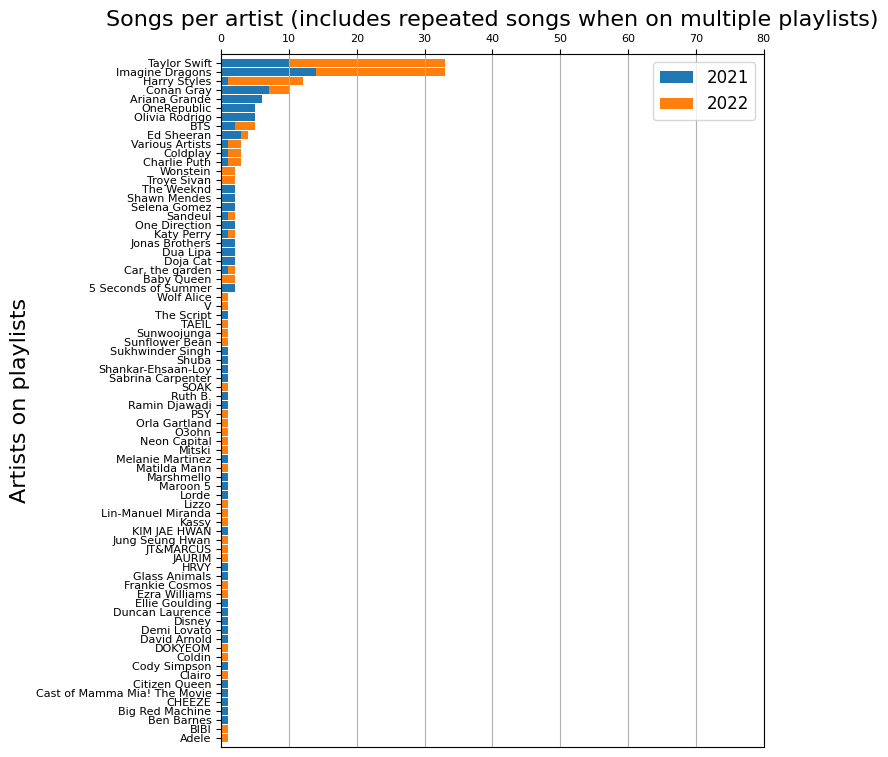

<Figure size 700x900 with 0 Axes>

In [ ]:
returned = get_all_artist_counts(Shriya_df_2021, Shriya_df_2022)

def get_vals(returned, j):
    vals = []
    for i in range(len(returned)):
        vals.append(returned[i][j])
    return vals

x = get_vals(returned, 0)

y_2021 = get_vals(returned, 1)
y_2022 = get_vals(returned, 2)

bars = np.add(y_2021, y_2022).tolist()


fig, ax = plt.subplots()
ax.xaxis.tick_top()

plt.rcParams["figure.figsize"] = (7, 9)
ax.grid(visible=True, which='major', axis='x')

ax.barh(x, y_2021)
ax.barh(x, y_2022, left=y_2021)


plt.xticks(size=8, rotation=0)
plt.yticks(size=8, rotation=0)
plt.legend(['2021','2022'], loc='upper right', fontsize='large')

plt.ylabel('Artists on playlists', size=16)
plt.xlim([0,80])
plt.ylim([-1,len(x)])
plt.title('Songs per artist (includes repeated songs when on multiple playlists)', size=16)

plt.show()
plt.savefig('/content/drive/MyDrive/MinorProject7/images/shriya.png', bbox_inches='tight')

In [ ]:
for df, year, count in zip(
    [Ananya_df_2021_,Ananya_df_2022_],
    ['2021', '2022'],
    ['Ananya_count_2021','Ananya_count_2022']):
    df['artist'] = df.iloc[:,0]
    df['year'] = [year] * len(df)
    df['count'] = df[count]
    df = df[['artist', 'year', 'count']]

bar_chart_race_df = pd.concat([Ananya_df_2021_, Ananya_df_2022_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

df_bcr = pd.DataFrame(index=['2021', '2022'])
for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
    df_bcr.loc[year, artist] = count
df_bcr = df_bcr.fillna(0)

for c in df_bcr.columns:
    df_bcr[c] = df_bcr[c].cumsum()
df_bcr

,BTS,Agust D,RM,IU,Various Artists,Taylor Swift,j-hope,Pritam,TOMORROW X TOGETHER,A.R. Rahman,...,Charlie Puth,Jimin,JalRaj,Anson Seabra,Harry Styles,Haley Reinhart,Dikshant,Crush,Conan Gray,『ユイカ』
2021,26.0,16.0,7.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,46.0,28.0,14.0,6.0,6.0,7.0,18.0,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    start = time.time()
    bcr.bar_chart_race(df_bcr,
                       filename='/content/drive/MyDrive/MinorProject7/images/video_ananyaa.mp4',
                       figsize=(24,12), #(24,12),
    #                    dpi=120,
                       n_bars=10,
                       fixed_max=False,
                       steps_per_period=100,
                       period_length=5000,
                       period_label={
                        'x': .91,
                        'y': .1,
                        'ha': 'right',
                        'va': 'center',
                        'size': 40},
                       title='Ananya Top Artists in 2021-2022: Number of songs per artist on 2021-2022 playlists',
                       title_size=34,
                       bar_label_size=30,
                       tick_label_size=30,
                       )
    (time.time() - start) / 60

<ipython-input-28-23f31388fc7b>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['name'])))
<ipython-input-28-23f31388fc7b>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist'])))
<ipython-input-28-23f31388fc7b>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist']))))
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12302 (\N{LEFT WHITE CORNER BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12518 (\N{KATAKANA LETTER YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.

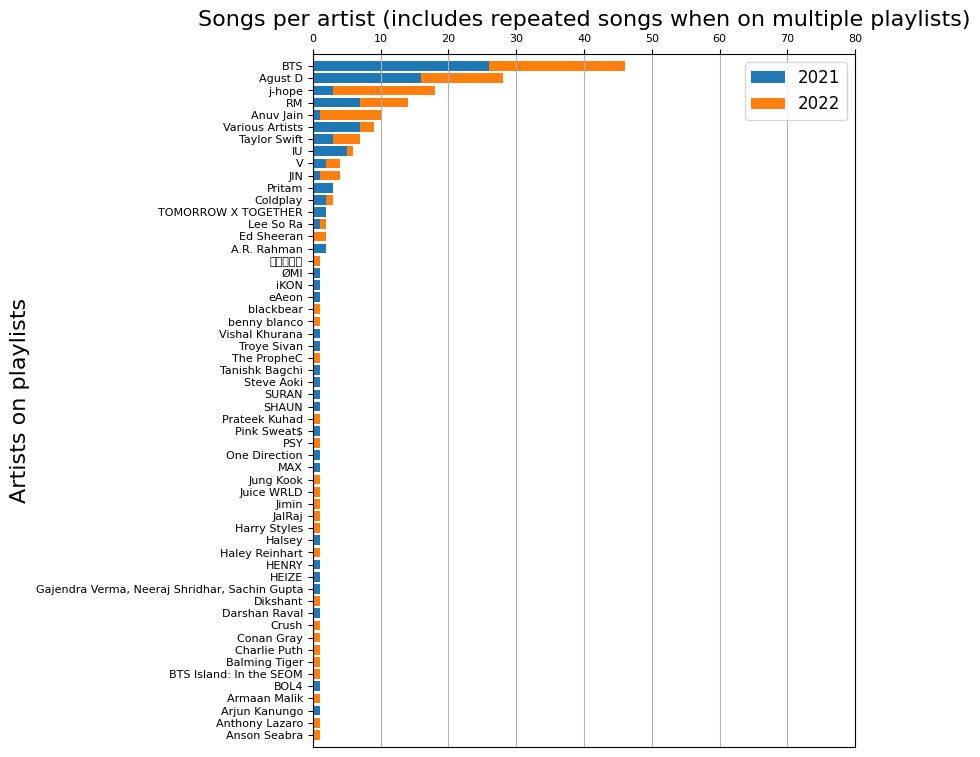

<Figure size 700x900 with 0 Axes>

In [ ]:
returned = get_all_artist_counts(Ananya_df_2021, Ananya_df_2022)

def get_vals(returned, j):
    vals = []
    for i in range(len(returned)):
        vals.append(returned[i][j])
    return vals

x = get_vals(returned, 0)

y_2021 = get_vals(returned, 1)
y_2022 = get_vals(returned, 2)

bars = np.add(y_2021, y_2022).tolist()


fig, ax = plt.subplots()
ax.xaxis.tick_top()

plt.rcParams["figure.figsize"] = (7, 9)
ax.grid(visible=True, which='major', axis='x')

ax.barh(x, y_2021)
ax.barh(x, y_2022, left=y_2021)


plt.xticks(size=8, rotation=0)
plt.yticks(size=8, rotation=0)
plt.legend(['2021','2022'], loc='upper right', fontsize='large')

plt.ylabel('Artists on playlists', size=16)
plt.xlim([0,80])
plt.ylim([-1,len(x)])
plt.title('Songs per artist (includes repeated songs when on multiple playlists)', size=16)

plt.show()
plt.savefig('/content/drive/MyDrive/MinorProject7/images/ananya.png', bbox_inches='tight')

In [ ]:
for df, year, count in zip(
    [Ritika_df_2021_,Ritika_df_2022_],
    ['2021', '2022'],
    ['Ritika_count_2021','Ritika_count_2022']):
    df['artist'] = df.iloc[:,0]
    df['year'] = [year] * len(df)
    df['count'] = df[count]
    df = df[['artist', 'year', 'count']]

bar_chart_race_df = pd.concat([Ritika_df_2021_, Ritika_df_2022_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

df_bcr = pd.DataFrame(index=['2021', '2022'])
for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
    df_bcr.loc[year, artist] = count
df_bcr = df_bcr.fillna(0)

for c in df_bcr.columns:
    df_bcr[c] = df_bcr[c].cumsum()
df_bcr

,BTS,(G)I-DLE,Agust D,j-hope,RM,TOMORROW X TOGETHER,Various Artists,IZ*ONE,IU,GOT7,...,Finding Hope,GEMINI,GOT the beat,HyunA&DAWN,Katy Perry,JEON SOMI,Jung Kook,B.I,KHAN,Jimin
2021,26.0,7.0,5.0,5.0,4.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,37.0,12.0,6.0,19.0,4.0,3.0,2.0,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    start = time.time()
    bcr.bar_chart_race(df_bcr,
                       filename='/content/drive/MyDrive/MinorProject7/images/video_ritika.mp4',
                       figsize=(24,12), #(24,12),
    #                    dpi=120,
                       n_bars=10,
                       fixed_max=False,
                       steps_per_period=100,
                       period_length=5000,
                       period_label={
                        'x': .91,
                        'y': .1,
                        'ha': 'right',
                        'va': 'center',
                        'size': 40},
                       title='Ritika Top Artists in 2021-2022: Number of songs per artist on 2021-2022 playlists',
                       title_size=34,
                       bar_label_size=30,
                       tick_label_size=30,
                       )
    (time.time() - start) / 60

<ipython-input-28-23f31388fc7b>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['name'])))
<ipython-input-28-23f31388fc7b>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist'])))
<ipython-input-28-23f31388fc7b>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist']))))


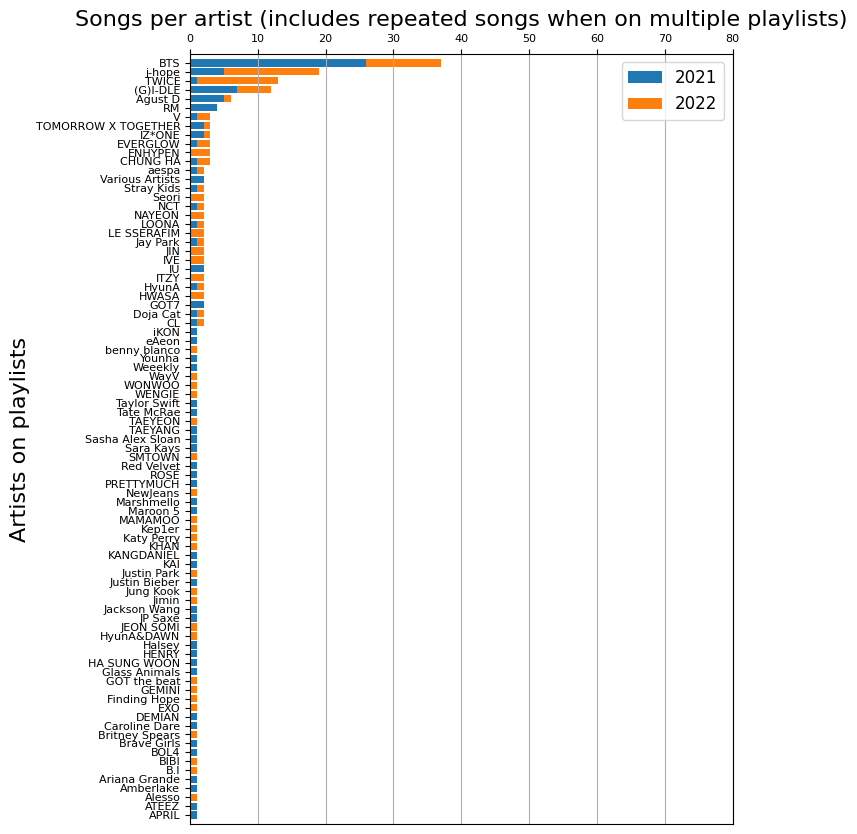

<Figure size 700x1000 with 0 Axes>

In [ ]:
returned = get_all_artist_counts(Ritika_df_2021, Ritika_df_2022)

def get_vals(returned, j):
    vals = []
    for i in range(len(returned)):
        vals.append(returned[i][j])
    return vals

x = get_vals(returned, 0)

y_2021 = get_vals(returned, 1)
y_2022 = get_vals(returned, 2)

bars = np.add(y_2021, y_2022).tolist()


fig, ax = plt.subplots()
ax.xaxis.tick_top()

plt.rcParams["figure.figsize"] = (7, 10)
ax.grid(visible=True, which='major', axis='x')

ax.barh(x, y_2021)
ax.barh(x, y_2022, left=y_2021)


plt.xticks(size=8, rotation=0)
plt.yticks(size=8, rotation=0)
plt.legend(['2021','2022'], loc='upper right', fontsize='large')

plt.ylabel('Artists on playlists', size=16)
plt.xlim([0,80])
plt.ylim([-1,len(x)])
plt.title('Songs per artist (includes repeated songs when on multiple playlists)', size=16)

plt.show()
plt.savefig('/content/drive/MyDrive/MinorProject7/images/ritika.png', bbox_inches='tight')

In [ ]:
for df, year, count in zip(
    [Arushi_df_2021_,Arushi_df_2022_],
    ['2021', '2022'],
    ['Arushi_count_2021','Arushi_count_2022']):
    df['artist'] = df.iloc[:,0]
    df['year'] = [year] * len(df)
    df['count'] = df[count]
    df = df[['artist', 'year', 'count']]

bar_chart_race_df = pd.concat([Arushi_df_2021_, Arushi_df_2022_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

df_bcr = pd.DataFrame(index=['2021', '2022'])
for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
    df_bcr.loc[year, artist] = count
df_bcr = df_bcr.fillna(0)

for c in df_bcr.columns:
    df_bcr[c] = df_bcr[c].cumsum()
df_bcr

,BTS,Ariana Grande,Agust D,Troye Sivan,j-hope,girl in red,Justin Bieber,Doja Cat,Lil Nas X,Glass Animals,...,PSY,Omar Rudberg,Neoni,Mokita,Chris Brown,Crush,Kali Uchis,Jung Kook,Jimin,Khalid
2021,26.0,7.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,34.0,8.0,4.0,10.0,6.0,4.0,3.0,3.0,4.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    start = time.time()
    bcr.bar_chart_race(df_bcr,
                       filename='/content/drive/MyDrive/MinorProject7/images/video_arushi.mp4',
                       figsize=(24,12), #(24,12),
    #                    dpi=120,
                       n_bars=10,
                       fixed_max=False,
                       steps_per_period=100,
                       period_length=5000,
                       period_label={
                        'x': .91,
                        'y': .1,
                        'ha': 'right',
                        'va': 'center',
                        'size': 40},
                       title='Arushi Top Artists in 2021-2022: Number of songs per artist on 2021-2022 playlists',
                       title_size=34,
                       bar_label_size=30,
                       tick_label_size=30,
                       )
    (time.time() - start) / 60

<ipython-input-28-23f31388fc7b>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['name'])))
<ipython-input-28-23f31388fc7b>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist'])))
<ipython-input-28-23f31388fc7b>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df2['artist']))))


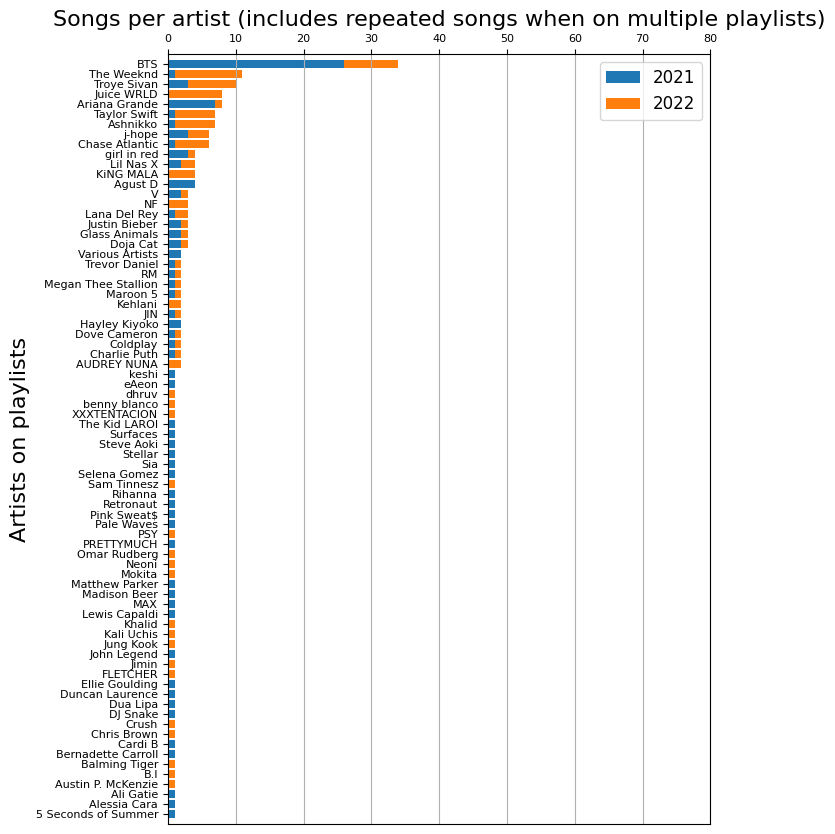

<Figure size 700x1000 with 0 Axes>

In [ ]:
returned = get_all_artist_counts(Arushi_df_2021, Arushi_df_2022)

def get_vals(returned, j):
    vals = []
    for i in range(len(returned)):
        vals.append(returned[i][j])
    return vals

x = get_vals(returned, 0)

y_2021 = get_vals(returned, 1)
y_2022 = get_vals(returned, 2)

bars = np.add(y_2021, y_2022).tolist()


fig, ax = plt.subplots()
ax.xaxis.tick_top()

plt.rcParams["figure.figsize"] = (7, 10)
ax.grid(visible=True, which='major', axis='x')

ax.barh(x, y_2021)
ax.barh(x, y_2022, left=y_2021)


plt.xticks(size=8, rotation=0)
plt.yticks(size=8, rotation=0)
plt.legend(['2021','2022'], loc='upper right', fontsize='large')

plt.ylabel('Artists on playlists', size=16)
plt.xlim([0,80])
plt.ylim([-1,len(x)])
plt.title('Songs per artist (includes repeated songs when on multiple playlists)', size=16)

plt.show()
plt.savefig('/content/drive/MyDrive/MinorProject7/images/arushi.png', bbox_inches='tight')

Songs per Artist in 2022

In [ ]:
for df, year, count in zip(
    [Ananya_df_2022_, Arushi_df_2022_, Ritika_df_2022_,Shriya_df_2022_],
    ['Ananya', 'Arushi', 'Ritika', 'Shriya'],
    ['Ananya_count_2022', 'Arushi_count_2022', 'Ritika_count_2022', 'Shriya_count_2022']):
    df['artist'] = df.iloc[:,0]
    df['year'] = [year] * len(df)
    df['count'] = df[count]
    df = df[['artist', 'year', 'count']]

bar_chart_race_df = pd.concat([Ananya_df_2022_, Arushi_df_2022_, Ritika_df_2022_, Shriya_df_2022_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

df_bcr = pd.DataFrame(index=['Ananya', 'Arushi', 'Ritika', 'Shriya'])
for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
    df_bcr.loc[year, artist] = count
df_bcr = df_bcr.fillna(0)

for c in df_bcr.columns:
    df_bcr[c] = df_bcr[c].cumsum()
df_bcr

<ipython-input-23-fab5cbeabb8b>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bcr.loc[year, artist] = count
<ipython-input-23-fab5cbeabb8b>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bcr.loc[year, artist] = count
<ipython-input-23-fab5cbeabb8b>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame

,BTS,j-hope,Agust D,Anuv Jain,RM,Taylor Swift,JIN,Various Artists,Ed Sheeran,V,...,Kassy,Jung Seung Hwan,JT&MARCUS,JAURIM,Frankie Cosmos,Ezra Williams,DOKYEOM,Coldin,Clairo,"Car, the garden"
Ananya,20.0,15.0,12.0,9.0,7.0,4.0,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arushi,28.0,18.0,12.0,9.0,8.0,10.0,4.0,2.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ritika,39.0,32.0,13.0,9.0,8.0,10.0,6.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shriya,42.0,32.0,13.0,9.0,8.0,33.0,6.0,4.0,3.0,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
def get_words(df):
    title_words = []
    for i in range(len(df['name'])):
        tokens = str(df.loc[i, 'name'])
        song_title_words = tokens.split()
        for j in range(len(song_title_words)):
            title_words.append(song_title_words[j].lower())
    title_words = ' '.join(title_words)
    return title_words


def make_wordcloud(text, name):
    text = text.lower()
    wordcloud = WordCloud(min_font_size=8, max_font_size=40, max_words=300, background_color="white",
                          collocations=False, margin=1,
                          colormap="Dark2").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(name)
    plt.show()

### **2021**

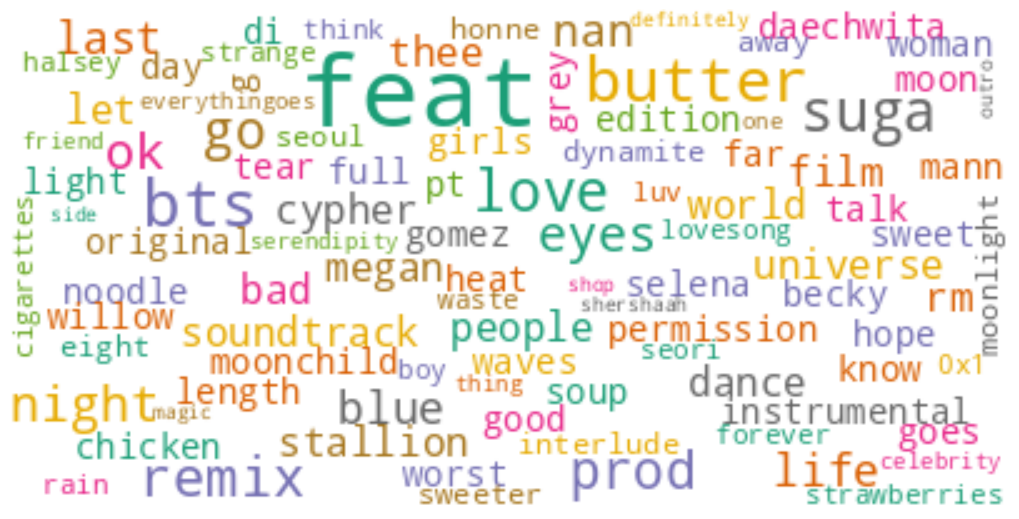

In [ ]:
words_Ananya = get_words(Ananya_df_2021)
words_Arushi = get_words(Arushi_df_2021)
words_Ritika = get_words(Ritika_df_2021)
words_Shriya = get_words(Shriya_df_2021)


make_wordcloud(words_Ananya +\
               words_Arushi +\
               words_Ritika +\
               words_Shriya,
               "/content/drive/MyDrive/MinorProject7/images/word_cloud_2021.png")

### **2022**

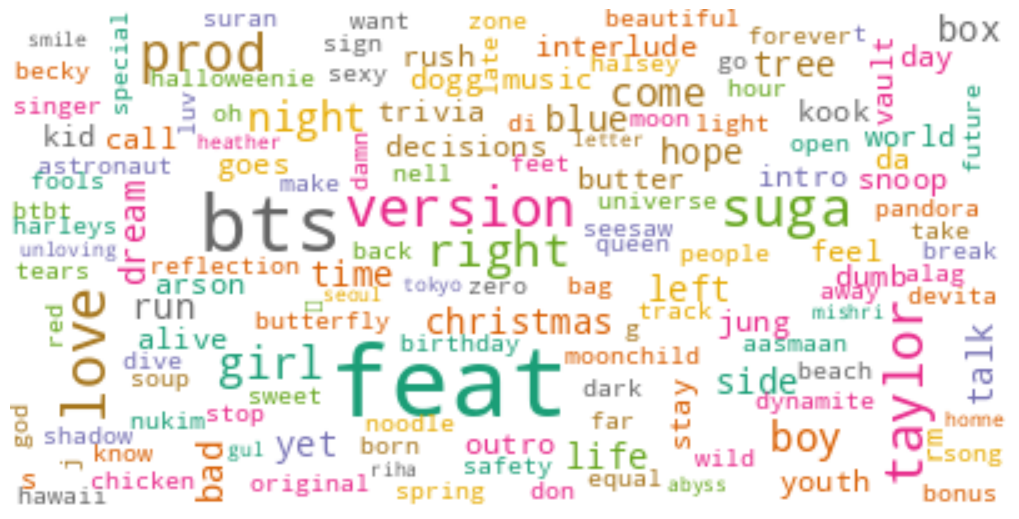

In [ ]:
words_Ananya = get_words(Ananya_df_2022)
words_Arushi = get_words(Arushi_df_2022)
words_Ritika = get_words(Ritika_df_2022)
words_Shriya = get_words(Shriya_df_2022)


make_wordcloud(words_Ananya +\
               words_Arushi +\
               words_Ritika +\
               words_Shriya,
               "/content/drive/MyDrive/MinorProject7/images/word_cloud_2022.png")

## Spotify API Features

In [ ]:
Ananya__df_2021 = Ananya_df_2021.copy()
Ananya__df_2022 = Ananya_df_2022.copy()

Arushi__df_2021 = Arushi_df_2021.copy()
Arushi__df_2022 = Arushi_df_2022.copy()

Ritika__df_2021 = Ritika_df_2021.copy()
Ritika__df_2022 = Ritika_df_2022.copy()

Shriya__df_2021 = Shriya_df_2021.copy()
Shriya__df_2022 = Shriya_df_2022.copy()

In [ ]:
def list_song_feature(df, col, list_name):
    df.copy()
    df[col] = [list_name]*100
    return df

Ananya Dfs

In [ ]:
Ananya_dfs = [Ananya__df_2021, Ananya__df_2022]
list_name = [2021,2022]
for df, ln in zip(Ananya_dfs,list_name):
    df = list_song_feature(df, col='list_name', list_name=f"My Top Songs {ln}")
    df = list_song_feature(df, col='list_name_1', list_name=f"Our Top Songs {ln}\nAnanya: Dark, Arushi: Light")

Ananya_df_concat = pd.concat([Ananya__df_2021, Ananya__df_2022], ignore_index=True, axis=0)
# Ananya_df_concat

In [ ]:
Arushi_dfs = [Arushi__df_2021, Arushi__df_2022]
list_name = [2021,2022]
for df, ln in zip(Arushi_dfs,list_name):
    df = list_song_feature(df, col='list_name', list_name=f"My Top Songs {ln}")
    df = list_song_feature(df, col='list_name_1', list_name=f"Our Top Songs {ln}\nAnanya: Dark, Arushi: Light")

Arushi_df_concat = pd.concat([Arushi__df_2021, Arushi__df_2022], ignore_index=True, axis=0)
# Arushi_df_concat

In [ ]:
Ritika_dfs = [Ritika__df_2021, Ritika__df_2022]
list_name = [2021,2022]
for df, ln in zip(Ritika_dfs,list_name):
    df = list_song_feature(df, col='list_name', list_name=f"My Top Songs {ln}")
    df = list_song_feature(df, col='list_name_1', list_name=f"Our Top Songs {ln}\nRitika: Dark, Shriya: Light")

Ritika_df_concat = pd.concat([Ritika__df_2021, Ritika__df_2022], ignore_index=True, axis=0)
# Ritika_df_concat

In [ ]:
Shriya_dfs = [Shriya__df_2021, Shriya__df_2022]
list_name = [2021,2022]
for df, ln in zip(Shriya_dfs,list_name):
    df = list_song_feature(df, col='list_name', list_name=f"My Top Songs {ln}")
    df = list_song_feature(df, col='list_name_1', list_name=f"Our Top Songs {ln}\nRitika: Dark, Shriya: Light")

Shriya_df_concat = pd.concat([Shriya__df_2021, Shriya__df_2022], ignore_index=True, axis=0)
# Shriya_df_concat

In [ ]:
for df in [Ananya__df_2021, Ananya__df_2022]:
    df['release_year'] = pd.to_numeric(df['release_year'])
Ananya_df_concat['release_year'] = pd.to_numeric(Ananya_df_concat['release_year'])

In [ ]:
for df in [Arushi__df_2021, Arushi__df_2022]:
    df['release_year'] = pd.to_numeric(df['release_year'])
Arushi_df_concat['release_year'] = pd.to_numeric(Arushi_df_concat['release_year'])


In [ ]:
for df in [Ritika__df_2021, Ritika__df_2022]:
    df['release_year'] = pd.to_numeric(df['release_year'])
Ritika_df_concat['release_year'] = pd.to_numeric(Ritika_df_concat['release_year'])

In [ ]:
for df in [Shriya__df_2021, Shriya__df_2022]:
    df['release_year'] = pd.to_numeric(df['release_year'])
Shriya_df_concat['release_year'] = pd.to_numeric(Shriya_df_concat['release_year'])

In [ ]:
cols = ['acousticness',
        'energy',
        'danceability',
        'valence',
        'liveness',
        'speechiness',
        'instrumentalness',
        'loudness',
        'length',
        'tempo',
        'popularity',
        'mode',
        'key',
        'time_signature',
        'release_year']


In [ ]:
def list_song_feature(df, col, list_name):
    df.copy()
    df[col] = [list_name]*100
    return df


In [ ]:
# Create function to do linear transformation on variable to change value to [0,1]
def convert_scale(df, col):
    df[col + '_old'] = df[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col]=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return


In [ ]:
for x in cols:
    convert_scale(Ananya_df_concat, x)

In [ ]:
for x in cols:
    convert_scale(Ritika_df_concat, x)

In [ ]:
for x in cols:
    convert_scale(Shriya_df_concat, x)

In [ ]:
Ananya_df_concat = Ananya_df_concat.sort_values(by=['list_name']+cols, ascending=True)
# Ananya_df_concat


In [ ]:
Ritika_df_concat = Ritika_df_concat.sort_values(by=['list_name']+cols, ascending=True)
# Ritika_df_concat


In [ ]:
Shriya_df_concat = Shriya_df_concat.sort_values(by=['list_name']+cols, ascending=True)
# Shriya_df_concat


In [ ]:
Ananya_feature_mean = Ananya_df_concat.groupby('list_name').mean()[cols]
Ananya_feature_mean.columns = cols
# Ananya_feature_mean


<ipython-input-27-bb5e36496e21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ananya_feature_mean = Ananya_df_concat.groupby('list_name').mean()[cols]


In [ ]:
Ritika_feature_mean = Ritika_df_concat.groupby('list_name').mean()[cols]
Ritika_feature_mean.columns = cols
# Ritika_feature_mean

<ipython-input-104-24e8221a4136>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ritika_feature_mean = Ritika_df_concat.groupby('list_name').mean()[cols]


In [ ]:
Shriya_feature_mean = Shriya_df_concat.groupby('list_name').mean()[cols]
Shriya_feature_mean.columns = cols
# Shriya_feature_mean


<ipython-input-74-3cd678f3a492>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Shriya_feature_mean = Shriya_df_concat.groupby('list_name').mean()[cols]


In [ ]:
for x in cols:
    convert_scale(Arushi_df_concat, x)

In [ ]:
Arushi_df_concat = Arushi_df_concat.sort_values(by=['list_name']+cols, ascending=True)
# Arushi_df_concat

In [ ]:
Arushi_feature_mean = Arushi_df_concat.groupby('list_name').mean()[cols]
Arushi_feature_mean.columns = cols
# Arushi_feature_mean

<ipython-input-31-e9f1978c1ef4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Arushi_feature_mean = Arushi_df_concat.groupby('list_name').mean()[cols]


In [ ]:
def get_values(list1,list2,
               feature,
               labels,
               multiple=False,
               list7=None,list8=None,
               feature2=None):

    # Let's look at the list[K-pop] and plot it.
    values1 = feature.loc[list1].tolist()
    values2 = feature.loc[list2].tolist()
    # values3 = feature.loc[list3].tolist()
    # values4 = feature.loc[list4].tolist()
    # values5 = feature.loc[list5].tolist()
    # values6 = feature.loc[list6].tolist()

    if multiple:
        values7 = feature2.loc[list7].tolist()
        values8 = feature2.loc[list8].tolist()
        # values9 = feature2.loc[list9].tolist()
        # values10 = feature2.loc[list10].tolist()
        # values11 = feature2.loc[list11].tolist()
        # values12 = feature2.loc[list12].tolist()
    #  Number of variables we're plotting.
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    # and append the start value to the end.
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]
    # values3 += values3[:1]
    # values4 += values4[:1]
    # values5 += values5[:1]
    # values6 += values6[:1]

    if multiple:
        values7 += values1[:1]
        values8 += values2[:1]
        # values9 += values3[:1]
        # values10 += values4[:1]
        # values11 += values5[:1]
        # values12 += values6[:1]

    if multiple:
        return angles, \
               list1,list2,\
               list7,list8,\
               values1,values2,\
               values7,values8,\
               labels
    else:
        return angles, \
           list1,list2,\
           values1,values2, \
           labels

In [ ]:
def plot_radar(angles,
               list1,list2,
               color1,color2,
               values1,values2,
               labels,
               title_y,
               save=False,
               name=False,
               i=False,
               multiple=False,
               color7=None,color8=None,color9=None,color10=None,color11=None,color12=None,
               values7=None,values8=None,values9=None,values10=None,values11=None,values12=None):

    fig,([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(3,
                                                       2,
                                                       figsize=(18, 18),
                                                       subplot_kw=dict(polar=True),
                                                       gridspec_kw={'wspace':0,
                                                                    'hspace':.2,
                                                                    'top':1.,
                                                                    'bottom':0.,
                                                                    'left':0.,
                                                                    'right':1.})
    ax1.plot(angles,values1,color=color1, linewidth=1)
    ax1.fill(angles,values1,color=color1, alpha=0.6)
    ax2.plot(angles,values2,color=color2, linewidth=1)
    ax2.fill(angles,values2,color=color2, alpha=0.6)
    # ax3.plot(angles,values3,color=color3, linewidth=1)
    # ax3.fill(angles,values3,color=color3, alpha=0.6)
    # ax4.plot(angles,values4,color=color4, linewidth=1)
    # ax4.fill(angles,values4,color=color4, alpha=0.6)
    # ax5.plot(angles,values5,color=color5, linewidth=1)
    # ax5.fill(angles,values5,color=color5, alpha=0.6)
    # ax6.plot(angles,values6,color=color6, linewidth=1)
    # ax6.fill(angles,values6,color=color6, alpha=0.6)

    if multiple:
        ax1.plot(angles,values7,color=color7, linewidth=1)
        ax1.fill(angles,values7,color=color7, alpha=0.6)
        ax2.plot(angles,values8,color=color8, linewidth=1)
        ax2.fill(angles,values8,color=color8, alpha=0.6)
        # ax3.plot(angles,values9,color=color9, linewidth=1)
        # ax3.fill(angles,values9,color=color9, alpha=0.6)
        # ax4.plot(angles,values10,color=color10, linewidth=1)
        # ax4.fill(angles,values10,color=color10, alpha=0.6)
        # ax5.plot(angles,values11,color=color11, linewidth=1)
        # ax5.fill(angles,values11,color=color11, alpha=0.6)
        # ax6.plot(angles,values12,color=color12, linewidth=1)
        # ax6.fill(angles,values12,color=color12, alpha=0.6)

    # Fix axis to go in the right order and start at 12 o'clock.
    ax1.set_theta_offset(np.pi / 2)
    ax1.set_theta_direction(-1)
    ax2.set_theta_offset(np.pi / 2)
    ax2.set_theta_direction(-1)
    ax3.set_theta_offset(np.pi / 2)
    ax3.set_theta_direction(-1)
    ax4.set_theta_offset(np.pi / 2)
    ax4.set_theta_direction(-1)
    ax5.set_theta_offset(np.pi / 2)
    ax5.set_theta_direction(-1)
    ax6.set_theta_offset(np.pi / 2)
    ax6.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax1.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax2.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax3.set_thetagrids(np.degrees(angles)[:-1], labels)
    ax4.set_thetagrids(np.degrees(angles)[:-1], labels)
    ax5.set_thetagrids(np.degrees(angles)[:-1], labels)
    ax6.set_thetagrids(np.degrees(angles)[:-1], labels)

    # Set title
    ax1.set_title('{} {}'.format('Playlist: ', list1), y=title_y, loc = 'left', fontsize=10)
    ax2.set_title('{} {}'.format('Playlist: ', list2), y=title_y, loc = 'left', fontsize=10)
    # ax3.set_title('{} {}'.format('Playlist: ', list3), y=title_y, loc = 'left', fontsize=10)
    # ax4.set_title('{} {}'.format('Playlist: ', list4), y=title_y, loc = 'left', fontsize=10)
    # ax5.set_title('{} {}'.format('Playlist: ', list5), y=title_y, loc = 'left', fontsize=10)
    # ax6.set_title('{} {}'.format('Playlist: ', list6), y=title_y, loc = 'left', fontsize=10)

    # You can also set gridlines manually like this:
    ax1.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax3.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax4.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax5.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax6.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])

    ax1.set_rlabel_position(40)
    ax2.set_rlabel_position(40)
    ax3.set_rlabel_position(40)
    ax4.set_rlabel_position(40)
    ax5.set_rlabel_position(40)
    ax6.set_rlabel_position(40)

    if save:
        plt.savefig(f'../images/{name}_draw_radar.png', bbox_inches='tight')
    return


In [ ]:
values = get_values(Ritika_feature_mean.index.values[0],
           Ritika_feature_mean.index.values[1],
          #  Ananya_feature_mean.index.values[2],
          #  Ananya_feature_mean.index.values[3],
          #  Ananya_feature_mean.index.values[4],
          #  Ananya_feature_mean.index.values[5],
           feature=Ritika_feature_mean,
           labels=cols,
           multiple=False)

angles = values[0]
list1 = values[1]
list2 = values[2]
# list3 = values[3]
# list4 = values[4]
# list5 = values[5]
# list6 = values[6]
values1 = values[3]
values2 = values[4]
# values3 = values[9]
# values4 = values[10]
# values5 = values[11]
# values6 = values[12]
labels = values[5]


In [ ]:
color1,color2 = 'pink', 'brown'


FileNotFoundError: ignored

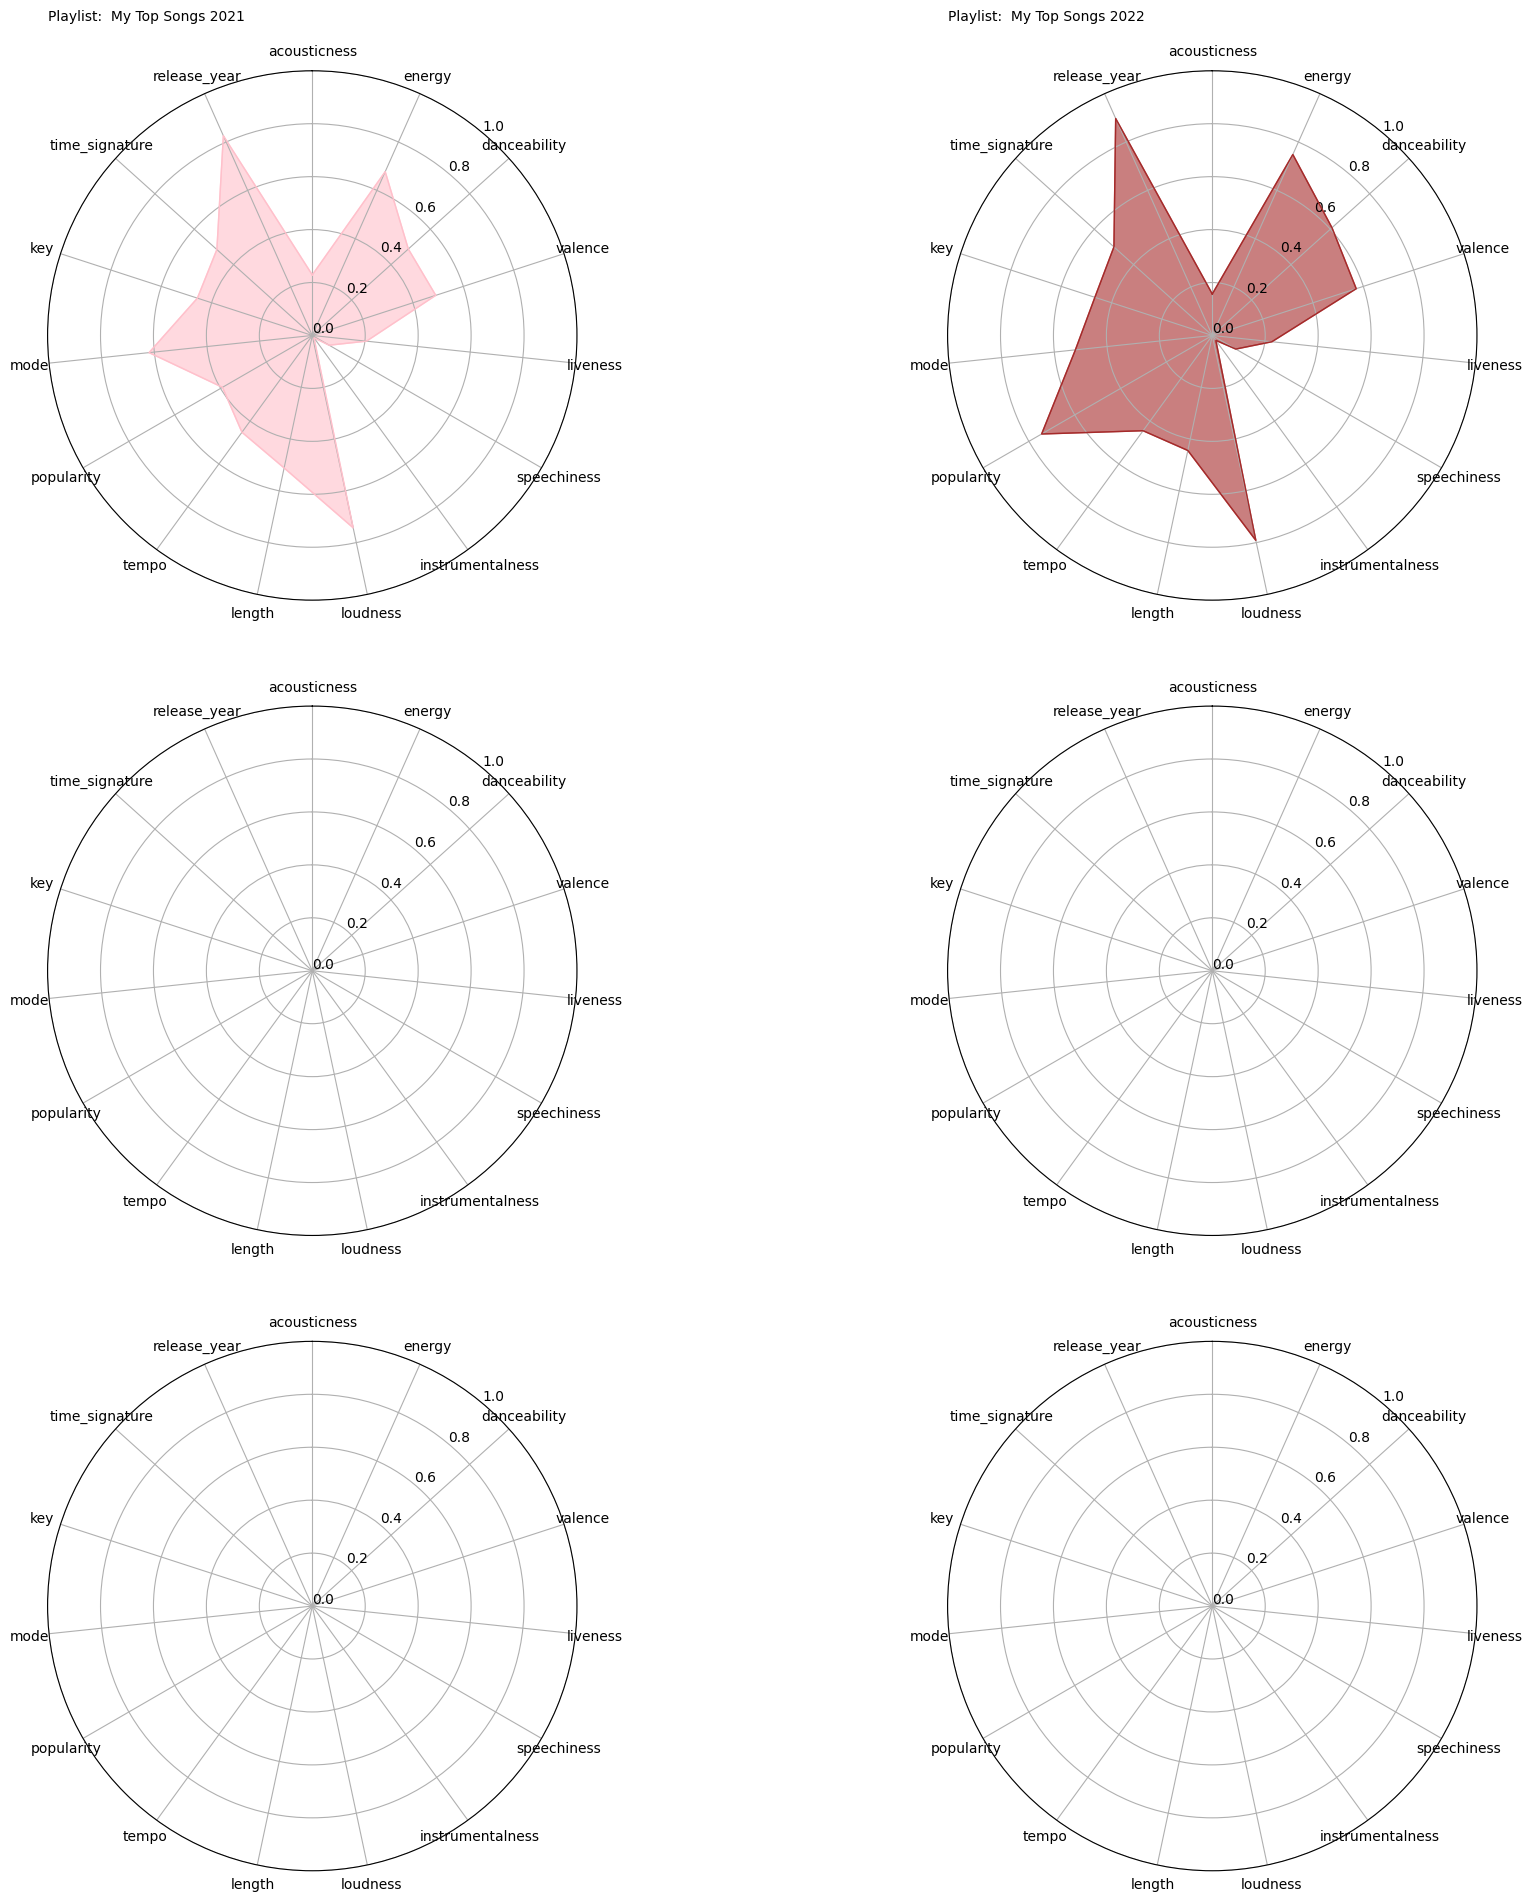

In [ ]:
plot_radar(angles,
           list1,list2,
           color1,color2,
           values1,values2,
           labels=cols,
           title_y=1.08,
           multiple=False,
           save=True,
           i='',
           name='Ritika')

In [ ]:
adam_feature_mean = adam_df_concat.groupby('list_name_1').mean()[cols]
adam_feature_mean.columns = cols
# adam_feature_mean


In [ ]:
brenda_feature_mean = brenda_df_concat.groupby('list_name_1').mean()[cols]
brenda_feature_mean.columns = cols
# brenda_feature_mean

In [ ]:
values = get_values(adam_feature_mean.index.values[0],
           adam_feature_mean.index.values[1],
           adam_feature_mean.index.values[2],
           adam_feature_mean.index.values[3],
           adam_feature_mean.index.values[4],
           adam_feature_mean.index.values[5],
           feature=adam_feature_mean,
           labels=cols,
           multiple=True,
           list7=brenda_feature_mean.index.values[0],
           list8=brenda_feature_mean.index.values[1],
           list9=brenda_feature_mean.index.values[2],
           list10=brenda_feature_mean.index.values[3],
           list11=brenda_feature_mean.index.values[4],
           list12=brenda_feature_mean.index.values[5],
           feature2=brenda_feature_mean)

angles = values[0]
list1 = values[1]
list2 = values[2]
list3 = values[3]
list4 = values[4]
list5 = values[5]
list6 = values[6]
list7 = values[7]
list8 = values[8]
list9 = values[9]
list10 = values[10]
list11 = values[11]
list12 = values[12]
values1 = values[13]
values2 = values[14]
values3 = values[15]
values4 = values[16]
values5 = values[17]
values6 = values[18]
values7 = values[19]
values8 = values[20]
values9 = values[21]
values10 = values[21]
values11 = values[22]
values12 = values[23]
labels = values[24]

In [ ]:
color1,color2,color3,color4 = 'blue', 'orange', 'green', 'red'
color5,color6,color7, color8= 'lightblue', 'bisque', 'lightgreen', 'lightcoral'


In [ ]:
plot_radar(angles,
           list1,list2,list3,list4,list5,list6,
           color1,color2,color3,color4,color5,color6,
           values1,values2,values3,values4,values5,values6,
           labels=cols,
           title_y=1.08,
           multiple=True,
           color7=color7,color8=color8,color9=color9,color10=color10,color11=color11,color12=color12,
           values7=values7,values8=values8,values9=values9,values10=values10,values11=values11,values12=values12,
           save=True,
           i='',
           name='2021_and_2022')